In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('medical-charges.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.duplicated().sum()

1

In [5]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


##### Feature engineering

In [9]:
df['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [10]:
# feature construction
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.8, 39.9, 53.2],
                            labels = ['under weight', 'normal weight', 'over weight', 'obesity', 'mobid obesity'])

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,over weight
1,18,male,33.770,1,no,southeast,1725.55230,obesity
2,28,male,33.000,3,no,southeast,4449.46200,obesity
3,33,male,22.705,0,no,northwest,21984.47061,normal weight
4,32,male,28.880,0,no,northwest,3866.85520,over weight


In [12]:
df['age_category'] = pd.cut(df['age'], bins=[17, 27, 39, 51, 64],
                            labels = ['Teen', 'Adolescence', 'Adult', 'Senior Adult'])

In [13]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_category
0,19,female,27.900,0,yes,southwest,16884.92400,over weight,Teen
1,18,male,33.770,1,no,southeast,1725.55230,obesity,Teen
2,28,male,33.000,3,no,southeast,4449.46200,obesity,Adolescence
3,33,male,22.705,0,no,northwest,21984.47061,normal weight,Adolescence
4,32,male,28.880,0,no,northwest,3866.85520,over weight,Adolescence


In [14]:
# visualization
num_col = df.select_dtypes(include=np.number).columns.tolist()
cat_col = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [15]:
num_col

['age', 'bmi', 'children', 'charges']

In [16]:
cat_col

['sex', 'smoker', 'region', 'bmi_category', 'age_category']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           1337 non-null   int64   
 1   sex           1337 non-null   object  
 2   bmi           1337 non-null   float64 
 3   children      1337 non-null   int64   
 4   smoker        1337 non-null   object  
 5   region        1337 non-null   object  
 6   charges       1337 non-null   float64 
 7   bmi_category  1337 non-null   category
 8   age_category  1337 non-null   category
dtypes: category(2), float64(2), int64(2), object(3)
memory usage: 86.6+ KB


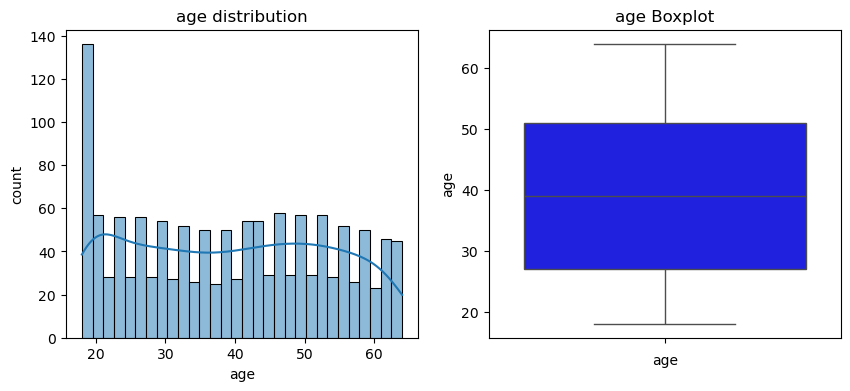

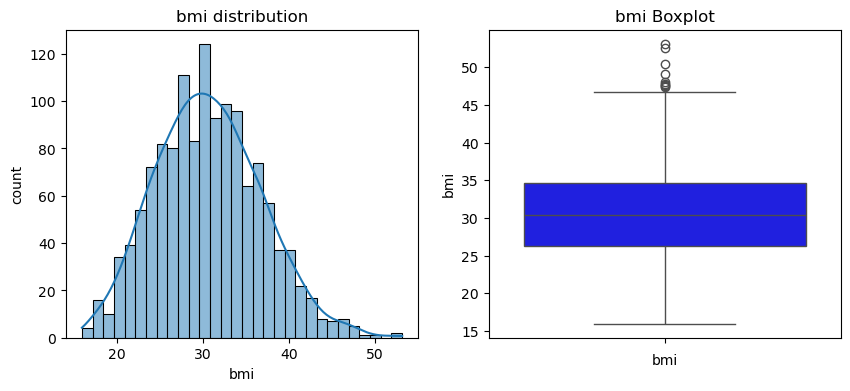

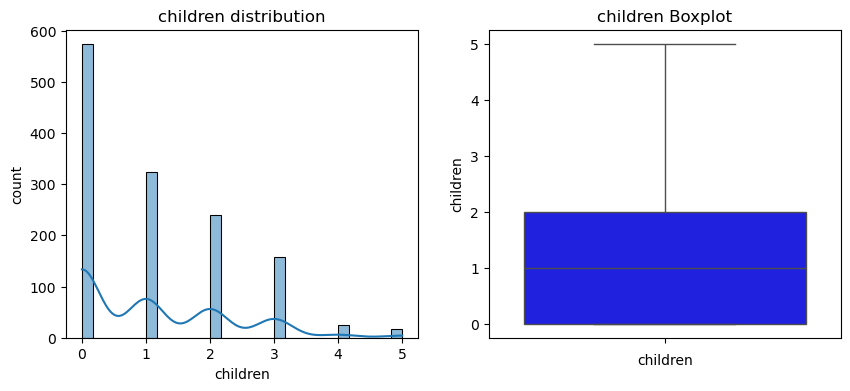

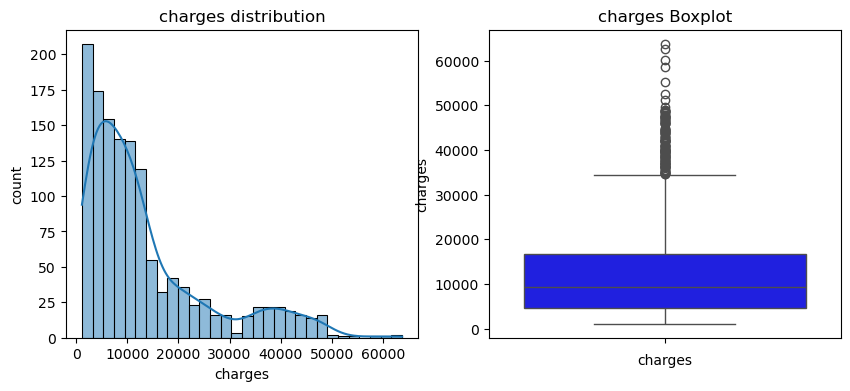

In [18]:
for col in num_col:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('count')

    plt.subplot(1, 2, 2)
    sns.boxplot(df[col], color='blue')
    plt.title(f'{col} Boxplot')
    plt.xlabel(col) 

    plt.tight_layout
    plt.show()

In [19]:
# feature transformations 
#logarithm
#squre root
#Cube Root Transformation
#Box-Cox Transformation
#Reciprocal Transformation

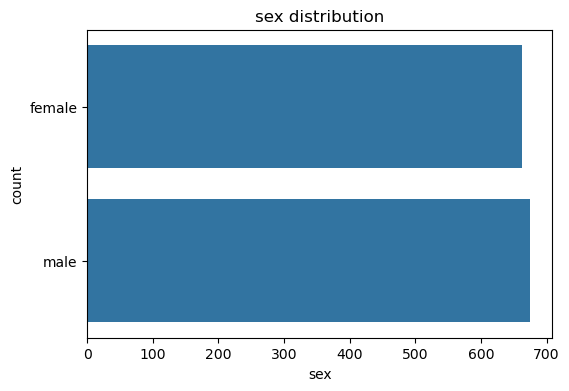

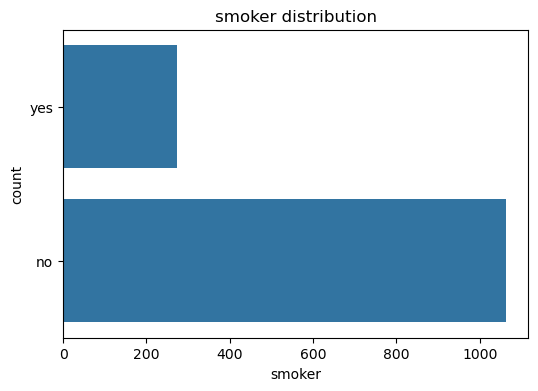

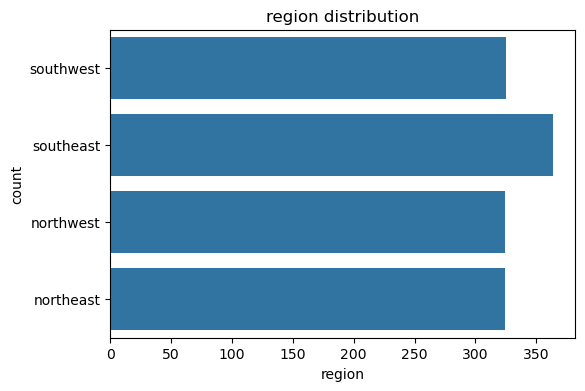

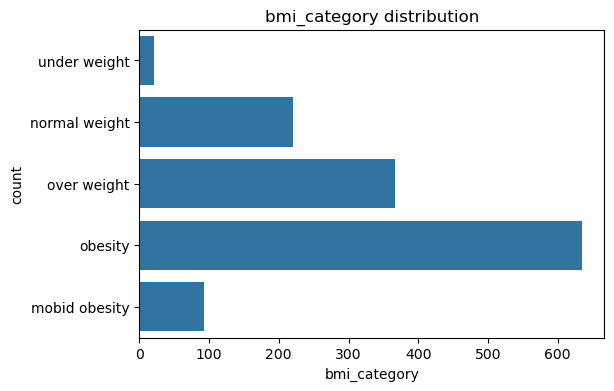

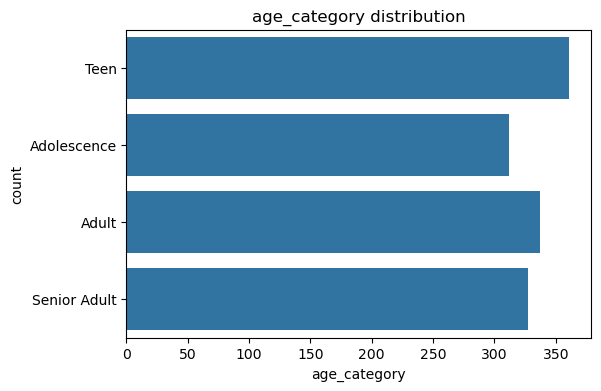

In [20]:
for col in cat_col:
    
    plt.figure(figsize=(6, 4))
    sns.countplot(df[col])
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('count')

IndexError: index 2 is out of bounds for axis 0 with size 2

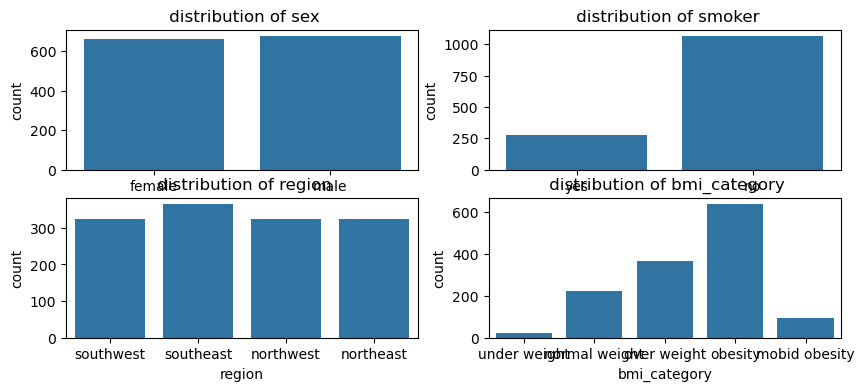

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(10, 4))
for i, col in enumerate(cat_col):
    ax = axes [i//2, i%2]
    sns.countplot(ax=ax, data = df, x=col)
    ax.set_title(f' distribution of {col}')

plt.tight_layout
plt.show()

In [22]:
# correlation matrix work well with numerical values
corr_matrix = df[num_col].corr()
corr_matrix

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


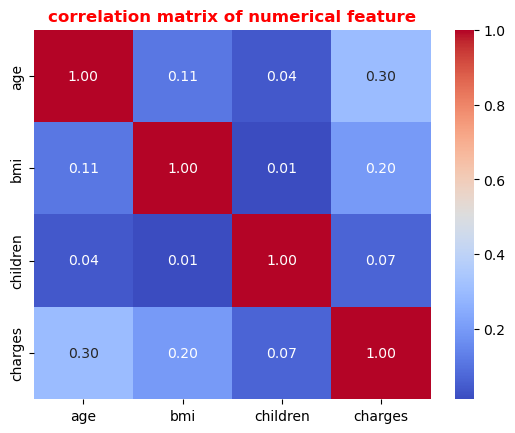

In [23]:
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('correlation matrix of numerical feature', fontweight='bold', fontsize=12, color='red')
plt.show()

#### Data preparation

In [24]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'bmi_category', 'age_category'],
      dtype='object')

In [25]:
# spliting data into target and features
feature = df.drop(columns ='charges')
target = df['charges']

In [26]:
feature

,age,sex,bmi,children,smoker,region,bmi_category,age_category
0,19,female,27.900,0,yes,southwest,over weight,Teen
1,18,male,33.770,1,no,southeast,obesity,Teen
2,28,male,33.000,3,no,southeast,obesity,Adolescence
3,33,male,22.705,0,no,northwest,normal weight,Adolescence
4,32,male,28.880,0,no,northwest,over weight,Adolescence
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,obesity,Adult
1334,18,female,31.920,0,no,northeast,obesity,Teen
1335,18,female,36.850,0,no,southeast,obesity,Teen
1336,21,female,25.800,0,no,southwest,over weight,Teen


In [27]:
target

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [28]:
# split into training and testa
from sklearn.model_selection import train_test_split

In [29]:
train_feature, test_feature, train_target, test_target = train_test_split(feature, target,
                                                                         test_size=0.2, random_state=42)

In [30]:
train_feature.shape, test_feature.shape

((1069, 8), (268, 8))

##### Data Preprocessing 

In [31]:
# coverting text value to numbers with nominal or ordinal
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [32]:
train_cat = encoder.fit_transform(train_feature[cat_col])
test_cat = encoder.transform(test_feature[cat_col])

In [33]:
train_cat = train_cat.toarray()
test_cat = test_cat.toarray()

#### Scaling the numerical feature
- standard scaler: uses Z-score $$Z = \frac{x - μ}{\sigma}$$
- MinMax scaler

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
num_col = ['age', 'bmi', 'children']

In [37]:
train_num = scaler.fit_transform(train_feature[num_col])
test_num = scaler.transform(test_feature[num_col])

In [38]:
train_num

array([[-1.1576804 , -0.99692768, -0.90790804],
       [-1.30061876, -0.79276204,  0.7669042 ],
       [ 0.91492586,  1.15466402,  0.7669042 ],
       ...,
       [-1.37208794, -1.4118716 , -0.07050192],
       [-0.08564268, -0.41997378,  1.60431032],
       [-0.30005022,  0.87941237,  0.7669042 ]])

In [39]:
train_processed = np.hstack((train_num, train_cat))
test_processed = np.hstack((test_num, test_cat))

#### Model Traning

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()

In [42]:
model.fit(train_processed, train_target)

LinearRegression()

In [43]:
train_pre = model.predict(train_processed)
test_pre = model.predict(test_processed)

In [44]:
train_pre 

array([ 2922.13737134,  3918.89044311, 15451.57792058, ...,
        1521.76567997,  6907.93173245,  9115.31265912])

In [45]:
test_pre

array([ 7291.90120713,  4627.73601795, 14505.35447266, 31645.05212261,
        8498.81038211, 13153.19973123, 32001.24563849,  1927.73278358,
       10437.38673612, 10188.94065956, 11032.86524424, 32741.23077425,
       30766.6978802 , 15861.14561664, 10324.83796583,  8083.73333822,
        5765.37708442, 31497.66180292,  4274.18994657,  3360.65131344,
        5144.10924072, 28636.77559361, 12605.04284058, 28776.01574377,
       30342.74159228,  7260.4081133 , 33222.03306129, 37856.4037407 ,
       11732.17001323, 14630.53736991,  6220.33138918, 12605.14261997,
        1293.45458838, 12090.91861789, 37771.26061177, 12290.31875217,
        5504.1419952 ,  3388.09862143, 31518.61297557,  7594.19641403,
        7912.58893705, 29675.16265393, 34941.44533451, 12543.86815472,
        6960.19886617,  1492.15359028,  5153.3925159 ,  9139.84801774,
        2528.62561316,  9365.06512019,  6557.82998743,  9142.26370191,
       29924.46241376,  5142.80952087, 10818.78203342, 10272.12435266,
      

In [46]:
train_target.head(5)

1114     2396.09590
968      3279.86855
599     33471.97189
170     13405.39030
275      9715.84100
Name: charges, dtype: float64

#### model evalution

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
train_mse = mean_squared_error(train_target, train_pre)
test_mse = mean_squared_error(test_target, test_pre)

In [49]:
train_mse, test_mse

(35551787.86897131, 37071350.030343294)

In [50]:
train_score = r2_score(train_target, train_pre)
test_score = r2_score(test_target, test_pre)

In [51]:
train_score, test_score 

(0.7403361682291962, 0.7982578141091887)

#### Regression matrix

In [52]:
error = train_target - train_pre

In [53]:
prediction_table = pd.DataFrame({
    'Actual': train_target,
    'Prediction' : train_pre,
    'Error' : error
})

In [54]:
prediction_table.head()

,Actual,Prediction,Error
1114,2396.09590,2922.137371,-526.041471
968,3279.86855,3918.890443,-639.021893
599,33471.97189,15451.577921,18020.393969
170,13405.39030,15809.756911,-2404.366611
275,9715.84100,8991.771087,724.069913


In [55]:
prediction_table['Error'].mean()

8.984344294407972e-13

#### Mean absolute Error (MAE)
- Mean Absolute Error (MAE) is a metric that calculates the average magnitude of the absolute errors between the predicted and actual values.

In [56]:
from sklearn.metrics import mean_absolute_error

In [57]:
mean_absolute_error(train_target,  train_pre)

4193.7865791657105

#### 2. Mean squqre error (MSE):
Mean Squared Error (MSE) is a metric used to evaluate the performance of a model in predicting continuous values. It measures the average squared difference between predicted values and actual values. A lower MSE indicates a better model fit. 

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
mean_squared_error(train_target,  train_pre)

35551787.86897131

#### Root mean square error (RMSE):
Root Mean Square Error (RMSE) is a statistical measure used to quantify the average magnitude of errors between predicted and observed values. It's essentially the square root of the average of the squared differences between the predicted and actual values, making it a measure of the standard deviation of the residuals (prediction errors). A lower RMSE indicates a better fit of the model to the data. 

In [60]:
np.sqrt(mean_squared_error(train_target,  train_pre))

5962.532001505007

#### R2 score

In [61]:
from sklearn.metrics import r2_score

In [62]:
r2_score(train_target,  train_pre)

0.7403361682291962

#### Adjusted R2

In [63]:
n = train_target.shape[0]
k = df.shape[1]-1

In [64]:
r = r2_score(train_target,  train_pre)

In [65]:
adj = 1 - (((1 - r) * (n - 1)) / (n - k - 1))

In [66]:
adj

0.7383764411969638